In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

## 데이터 준비

* 속성 정보
    * `datetime` - 시간대별 데이터 제공. timestamp(날짜와 시간 결합) 형태
    * `season`  - 1 = spring, 2 = summer, 3 = fall, 4 = winter
    * `holiday` - 공휴일(주말이 아닌 빨간날). 1-yes, 2-no
    * `workingday` - 주말, 공휴일을 제외한 날 1-yes, 2-no
    * `weather`
        * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
        * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    * `temp` - 섭씨온도
    * `atemp` - 섭씨체감온도
    * `humidity` - 상대습도
    * `windspeed` - 풍속
    * `casual` - 비회원 대여량
    * `registered` - 회원 대여량
    * `count` - 총 대여량

In [2]:
df = pd.read_csv('C:/Users/EL087/Desktop/MS_MachineLearning/data/bike_sharing_demand.csv', parse_dates=['datetime'])
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# 데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


# 파생컬럼 추가
- datetime 타입의 데이터로부터 날짜, 시간 관련 정보 추출
- dt 접근자를 사용
    - `컬럼.dt.year`
    - `컬럼.dt.month`    
    - `컬럼.dt.day`
    - `컬럼.dt.hour`
    - `컬럼.dt.dayofweek`

In [4]:
# 연, 월, 일, 시, 요일
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek # 월요일:0, 일요일:6
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


# 데이터 탐색(EDA)
* 데이터의 품질 확인(값의 분포, 결측치, 이상치 등)
* 독립변수와 종속변수간의 관계를 중점적으로 탐색

In [5]:
# ------------------------
# 데이터 수집 기간
# ------------------------
df['datetime'].min(), df['datetime'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

In [6]:
# ------------------------------------------------
# 독립변수 - 범주형, 수치형, 순환형 변수 구분
# ------------------------------------------------
# cat_cols = ['season','holiday','workingday','weather']      
# num_cols = ['temp','atemp','humidity','windspeed', 'year']
# cycle_cols = ['month', 'day', 'hour', 'dayofweek']
cat_cols = ['season','holiday','workingday','weather']      # 범주형     
num_cols = ['temp','atemp','humidity','windspeed', 'year']  # 수치형
cycle_cols = ['month', 'day', 'hour', 'dayofweek']          # 순환형

## 독립변수의 통계적 특성

### 범주형 변수

In [7]:
# 범주형 변수 찾기
cat_cols

['season', 'holiday', 'workingday', 'weather']

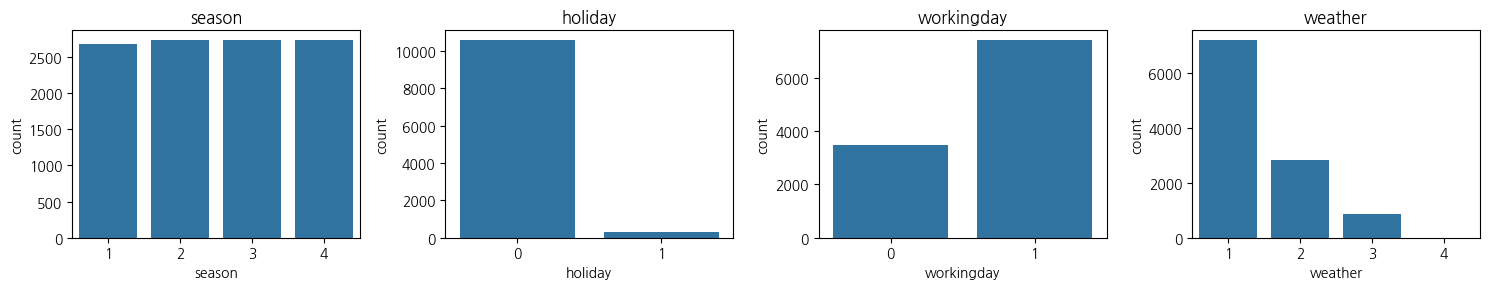

In [8]:
# ---------------------------
# 각 범주별 데이터 빈도수 시각화
# ---------------------------
fig, ax = plt.subplots(1, 4, figsize=(15, 3))
axes = ax.flatten()     # 여러 개의 그래프를 한 그림에 나타낼 때, 1차원 배열로 변환
for i, feature in enumerate(cat_cols):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(feature)
plt.tight_layout()

In [9]:
# ---------------------------
# 각 범주별 데이터 빈도수
# ---------------------------
for i, feature in enumerate(cat_cols):
    display(df[feature].value_counts())

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

holiday
0    10575
1      311
Name: count, dtype: int64

workingday
1    7412
0    3474
Name: count, dtype: int64

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [10]:
# df['weater']이 4인 모든 행 추출
df.loc[df['weather']==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,0


## 수치형 변수
- 각 데이터의 분포

In [11]:
# 수치형 데이터 찾기
num_cols

['temp', 'atemp', 'humidity', 'windspeed', 'year']

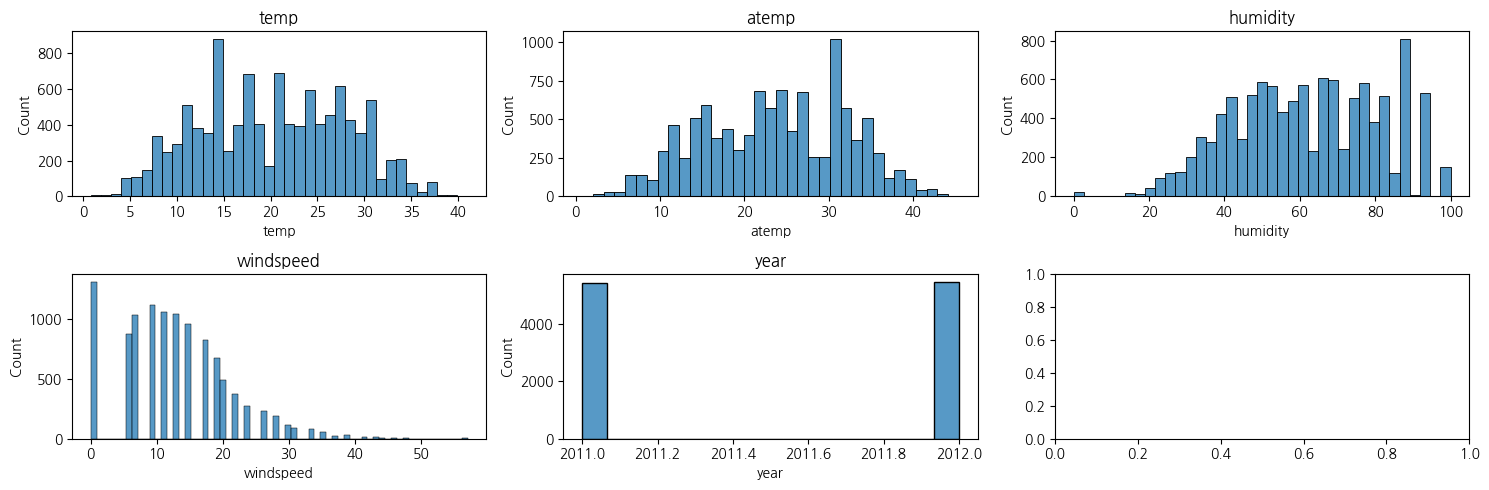

In [12]:
# ---------------------------
# 수치형 데이터의 분포 시각화
# ---------------------------
fig, ax = plt.subplots(2, 3, figsize=(15,5))
axes=ax.flatten()
for i, feature in enumerate(num_cols):
    sns.histplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(feature)
plt.tight_layout()

<Axes: >

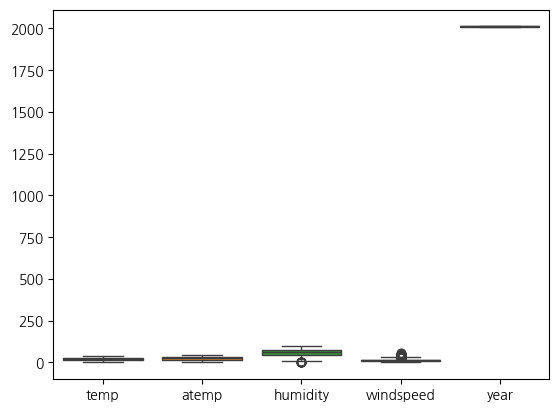

In [13]:
# ---------------------------
# 수치형 데이터 박스플롯
# ---------------------------
sns.boxplot(df[num_cols])

In [14]:
# ---------------------------
# 수치형 데이터의 요약통계
# ---------------------------
df[num_cols].describe()

,temp,atemp,humidity,windspeed,year
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,2011.501929
std,7.79159,8.474601,19.245033,8.164537,0.500019
min,0.82000,0.760000,0.000000,0.000000,2011.000000
25%,13.94000,16.665000,47.000000,7.001500,2011.000000
50%,20.50000,24.240000,62.000000,12.998000,2012.000000
75%,26.24000,31.060000,77.000000,16.997900,2012.000000
max,41.00000,45.455000,100.000000,56.996900,2012.000000


## 독립변수와 종속변수의 관계

### 범주형 변수
- 막대그래프로 확인

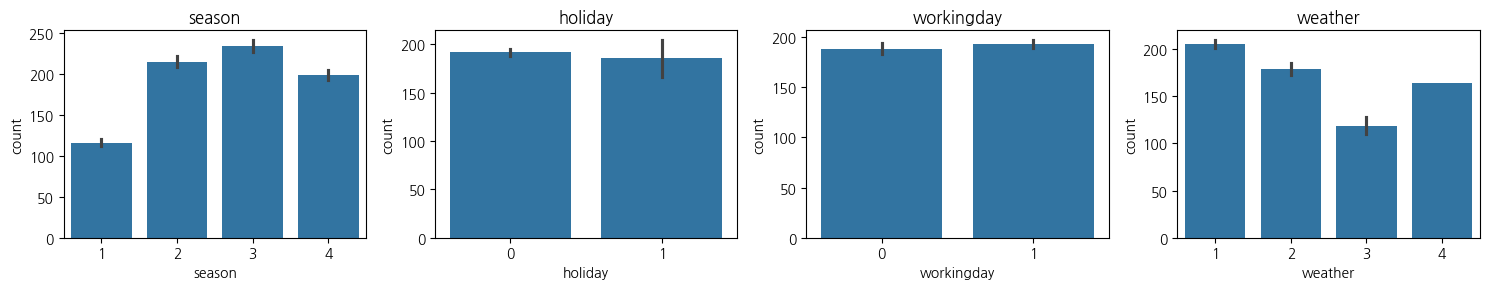

In [15]:
fig, ax = plt.subplots(1, 4, figsize=(15,3))
axes = ax.flatten()

for i, feature in enumerate(cat_cols):
    sns.barplot(x=feature, y='count', data=df, ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()

### 수치형 변수
- 산점도로 확인

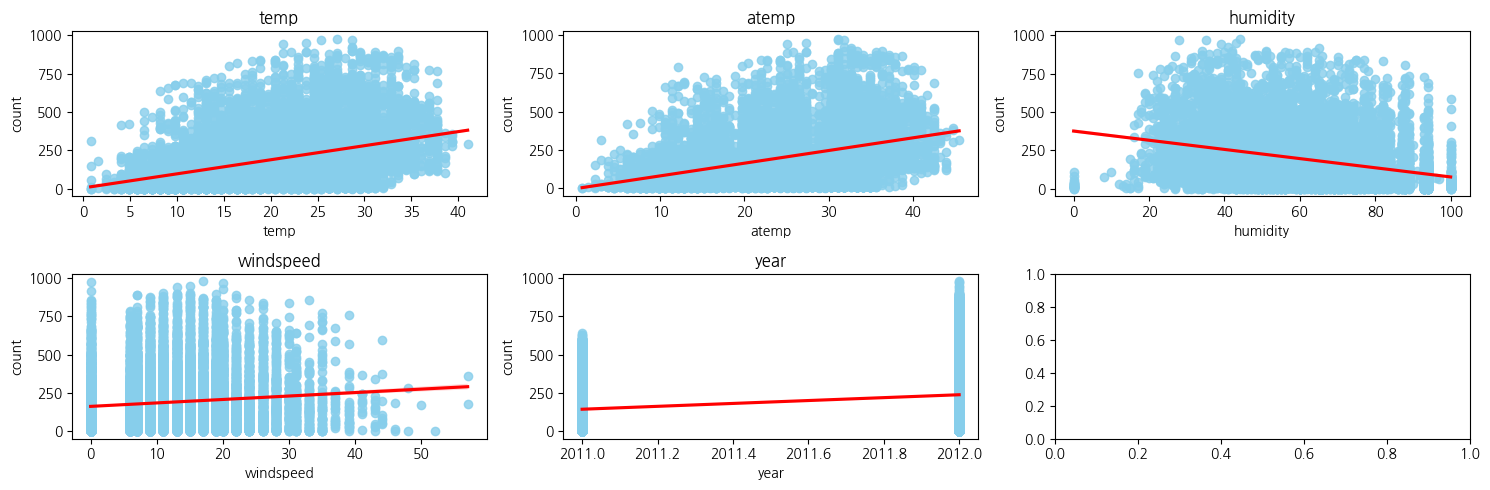

In [16]:
fig, ax = plt.subplots(2, 3, figsize=(15,5))
axes = ax.flatten()

for i, feature in enumerate(num_cols):
    sns.regplot(x=feature, y='count', data=df, ax=axes[i], 
                scatter_kws={'color': 'skyblue'},
                line_kws={'color': 'red'})  # OLS 선형 회귀선(데이터의 추세를 나타내는 선)의 색상
    axes[i].set_title(feature)

plt.tight_layout()

실제 온도(temp)와 체감온도(atemp)의 그래프
- 온도가 상승할 수록 대여 빈도수(count)가 선형적으로 증가하는 양의 상관관계를 보임
- 보통 온도가 약 15 ~ 25도 일 때 대여량이 많고, 양극단으로 갈수록 감소하는 것이 일반적인 특징
- 그래프의 파란색 산점도를 보면, 실제 30 ~ 40도 구간에서 점이 아래로 퍼지면서 밀도가 낮아지는 경향이 보일 수 있음  

    -> 선형 회귀는 데이터의 직선적인 관계를 파악하는데 좋지만, 이 같은 비선형적인 관계는 파악하지 못함

- count 빈도 수가 높은 순으로 temp 정렬

In [17]:
# 'temp_bins'라는 새로운 열 생성 (5도 간격)
# 예를 들어, 0~5도는 5로, 5~10도는 10으로 레이블링
df['temp_bins'] = np.ceil(df['temp'] / 5) * 5

# 1. 'temp_bins'를 기준으로 그룹화하고 'count'의 평균을 계산
temp_count_avg = df.groupby('temp_bins')['count'].mean().reset_index()

# 2. 평균 'count'를 기준으로 내림차순 정렬
temp_count_sorted = temp_count_avg.sort_values(by='count', ascending=False)

# 결과 출력
print(temp_count_sorted)

   temp_bins       count
6       35.0  334.538535
7       40.0  333.036458
8       45.0  294.000000
5       30.0  235.819432
4       25.0  209.965385
3       20.0  171.267885
2       15.0  131.797095
1       10.0   75.460177
0        5.0   53.263566


- 35도에서 가장 높은 피크를 찍고, 그보다 더 더운 45도에서는 감소하는 경향을 보임
- 이는 전형적인 역U자형(비선형) 관계를 보여줌
- 이전의 선형 회귀선은 전체 데이터에 억지로 직선을 맞춘 결과
- 즉, 선형 모델은 원래 패턴을 따라가지 못하고 단순히 우상향하는 평균적인 추세만을 보여줍니다.

## 순환형
- lineplot

In [18]:
# 순환형 변수 찾기
cycle_cols

['month', 'day', 'hour', 'dayofweek']

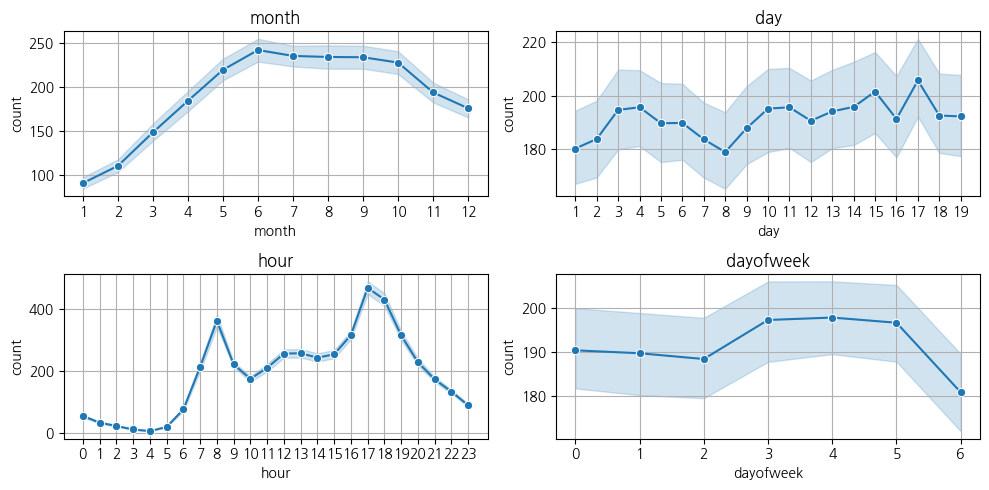

In [19]:
fig, ax = plt.subplots(2,2,figsize=(10,5))
axes = ax.flatten()

for i, feature in enumerate(cycle_cols):
    sns.lineplot(x=feature, y='count', data=df, ax=axes[i], marker='o')
    xticks = df[feature].unique()
    axes[i].set_xticks(xticks)
    axes[i].set_title(feature)
    axes[i].grid()

plt.tight_layout()

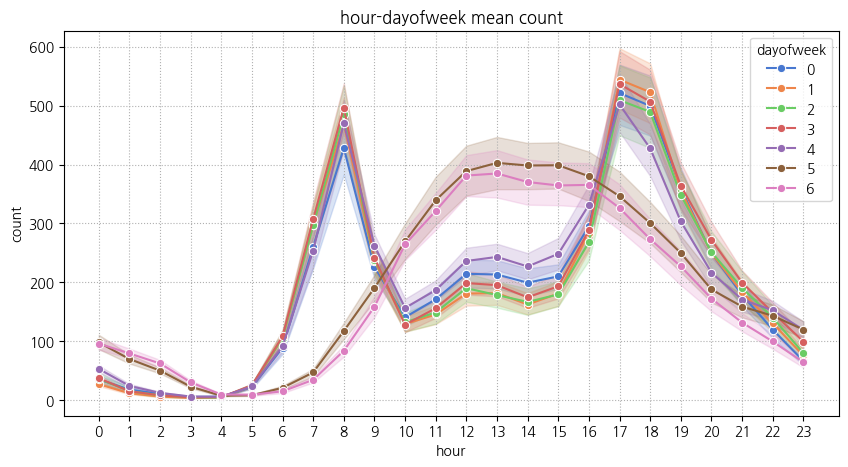

In [20]:
# -----------------------------
# 시간대 - 요일 별 평균 대여량
# -----------------------------
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='hour', y='count', marker='o', hue='dayofweek', palette='muted')
plt.title('hour-dayofweek mean count')
plt.xticks(range(0,24))
plt.grid(ls=':')
plt.show()

## 상관계수
* 피어슨 상관계수
    * 두 변수 간의 선형 관계의 강도와 방향을 측정.
    * 파이썬에서 corr()함수를 이용하여 구할 수 있음.
    * +1과 -1 사이의 값을 가진다.
        * +1 : 완벽한 양의 선형 상관 관계
        * -1 : 완벽한 음의 상관관계
        * 0 : 선형 상관 관계 없음,
    
* 다중공선성
    * 독립변수 간 강한 상관관계가 있는 경우
    * 문제점: 계수 추정치의 불안정, 통계적 유의성 저하, 해석의 어려움 등
    * 즉, 다중공선성은 회귀 모델의 예측력 자체에는 큰 영향을 주지 않을 수 있지만,   
    모델을 구성하는 개별 변수들의 영향력($\beta$ 계수)을 정확하게 파악하고 해석하는 것을 매우 어렵게 만듦
    * 그러므로, 둘 중 하나의 변수만 사용

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  dayofweek   10886 non-

<Axes: >

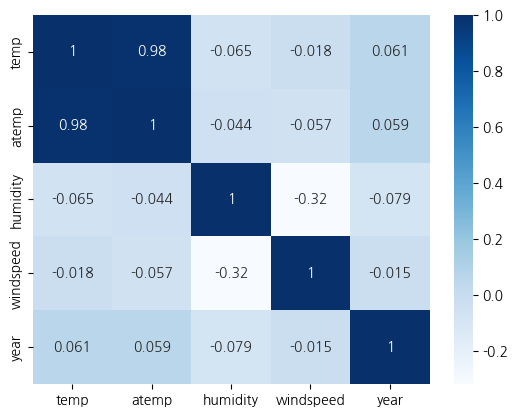

In [22]:
sns.heatmap(df[num_cols].corr(), cmap='Blues', annot=True)